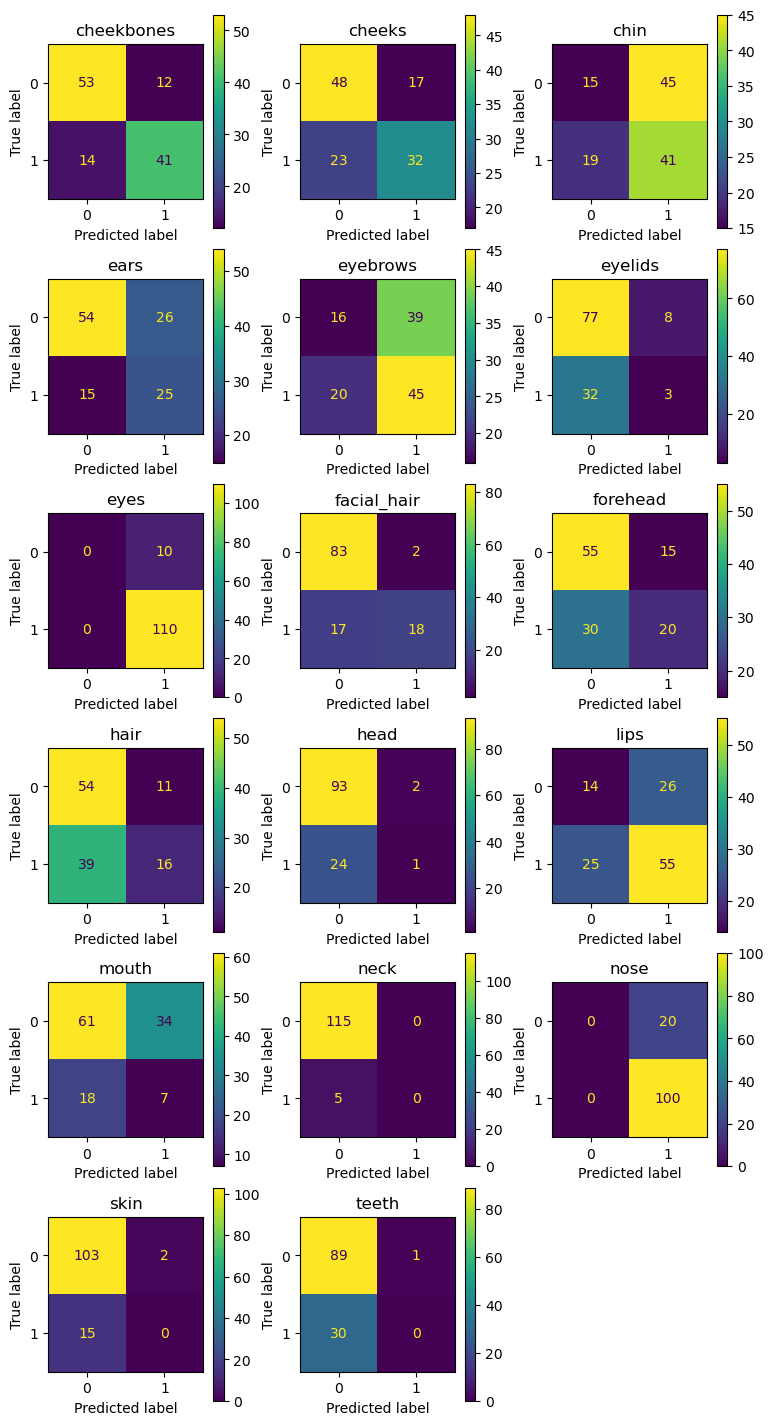

In [35]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt

transposed_labels = np.load('./saved_lists/transposed_lists/tlabels_prom_ver_id.npy')
transposed_predictions = np.load('./saved_lists/transposed_lists/tpredictions_prom_ver_id.npy')

feature_names = ["cheekbones", "cheeks", "chin", "ears", "eyebrows", "eyelids", "eyes", "facial_hair", "forehead", "hair", "head", "lips", "mouth", "neck", "nose", "skin", "teeth"]

num_features = len(feature_names)
num_cols = 3
num_rows = num_features // num_cols + min(1, num_features % num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9, num_rows * 3))

for i, ax in enumerate(axes.flat):
    if i < num_features:
        cm = confusion_matrix(transposed_labels[i], transposed_predictions[i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=ax)
        ax.set_title(feature_names[i])
    else:
        ax.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1, wspace=0.3)  # Increase/decrease the value as needed

plt.show()

In [93]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd

df_val = pd.read_csv('./saved_lists/f1_lists/f1_ver_sub_id.csv')

# Sort the DataFrame alphabetically based on Feature Name
df_sorted = df_val.sort_values(by='Feature Name')

# Get the feature names and their counts
feature_names = df_sorted['Feature Name'].tolist()

transposed_labels = np.load('./saved_lists/transposed_lists/tlabels_sub_ver_id.npy')
transposed_predictions = np.load('./saved_lists/transposed_lists/tpredictions_sub_ver_id.npy')

# Get the indices of the top 5 most frequent features in the sorted DataFrame
top_5_features = df_sorted.nlargest(5, 'Frequency Count')['Feature Name'].tolist()
top_5_indices_sorted = [feature_names.index(feature) for feature in top_5_features]

# Map the indices to the original ordering of features
top_5_indices_original = [feature_names.index(feature) for feature in top_5_features]

# Filter out rows where Frequency Count is 0
df_val_filtered = df_val[df_val['Frequency Count'] > 0]

# Sort the filtered DataFrame alphabetically based on Feature Name
df_sorted = df_val_filtered.sort_values(by='Feature Name')

# Get the indices of the 5 least frequent features in the sorted and filtered DataFrame
bottom_5_features = df_sorted.nsmallest(5, 'Frequency Count')['Feature Name'].tolist()

# Get the feature names and their counts after filtering
feature_names_filtered = df_sorted['Feature Name'].tolist()

# Get the indices of the bottom 5 features after filtering
bottom_5_indices_original = [feature_names.index(feature) for feature in bottom_5_features if feature in feature_names_filtered]

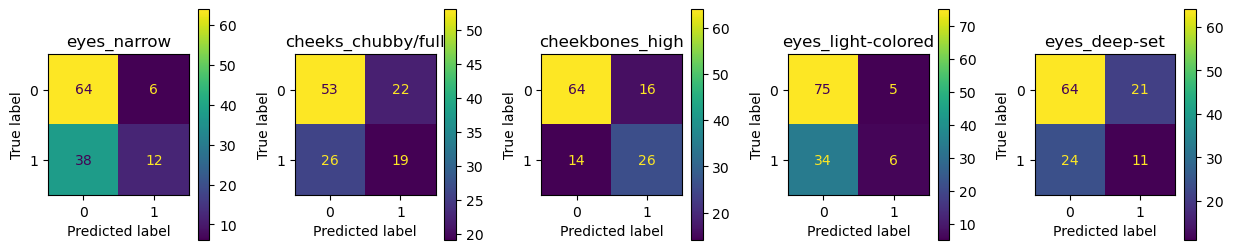

In [94]:
# Plot the Confusion matrices for the top 5 most frequent features
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, (index, ax) in enumerate(zip(top_5_indices_original, axes.flatten())):
    cm = confusion_matrix(transposed_labels[index], transposed_predictions[index])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.set_title(top_5_features[i])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Increase/decrease the value as needed

plt.show()

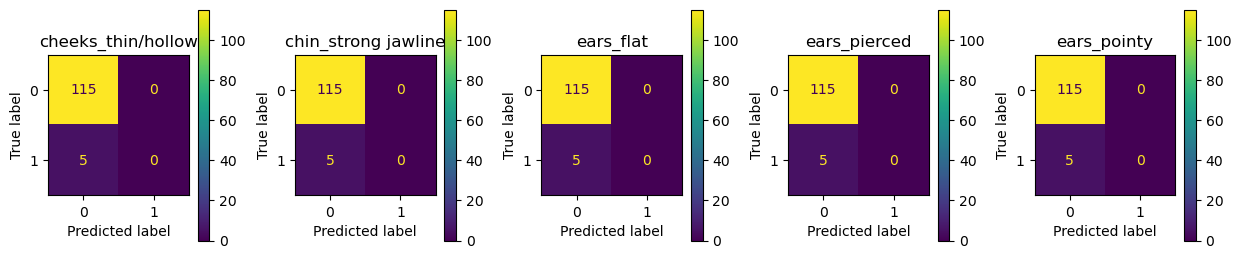

In [95]:
# Plot the Confusion matrices for the 5 least frequent features
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, (index, ax) in enumerate(zip(bottom_5_indices_original, axes.flatten())):
    cm = confusion_matrix(transposed_labels[index], transposed_predictions[index])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.set_title(bottom_5_features[i])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Increase/decrease the value as needed

plt.show()